<a href="https://colab.research.google.com/github/Ganeshkumar-1358/ai-ml/blob/main/LAB_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [20]:
car_data = datasets.fetch_openml(name='car', version=1, as_frame=True)
car_dict = car_data['DESCR']
print(car_dict)

feature_names = car_data['feature_names']
print(feature_names)

df = car_data['data']
print(df.info())
print(df.isnull().sum())

df['BinaryClass'] = car_data['target']

**Author**: Marko Bohanec, Blaz Zupan  
**Source**: [UCI](https://archive.ics.uci.edu/ml/datasets/car+evaluation) - 1997   
**Please cite**: [UCI](http://archive.ics.uci.edu/ml/citation_policy.html)  

**Car Evaluation Database**  
This database was derived from a simple hierarchical decision model originally developed for the demonstration of DEX (M. Bohanec, V. Rajkovic: Expert system for decision making. Sistemica 1(1), pp. 145-157, 1990.).

The model evaluates cars according to the following concept structure:
 
    CAR                      car acceptability
    . PRICE                  overall price
    . . buying               buying price
    . . maint                price of the maintenance
    . TECH                   technical characteristics
    . . COMFORT              comfort
    . . . doors              number of doors
    . . . persons            capacity in terms of persons to carry
    . . . lug_boot           the size of luggage boot
    . . safety               estim

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1027: UserWarning: Version 1 of dataset car is inactive, meaning that issues have been found in the dataset. Try using a newer version from this URL: https://api.openml.org/data/v1/download/21/car.arff
  warn(


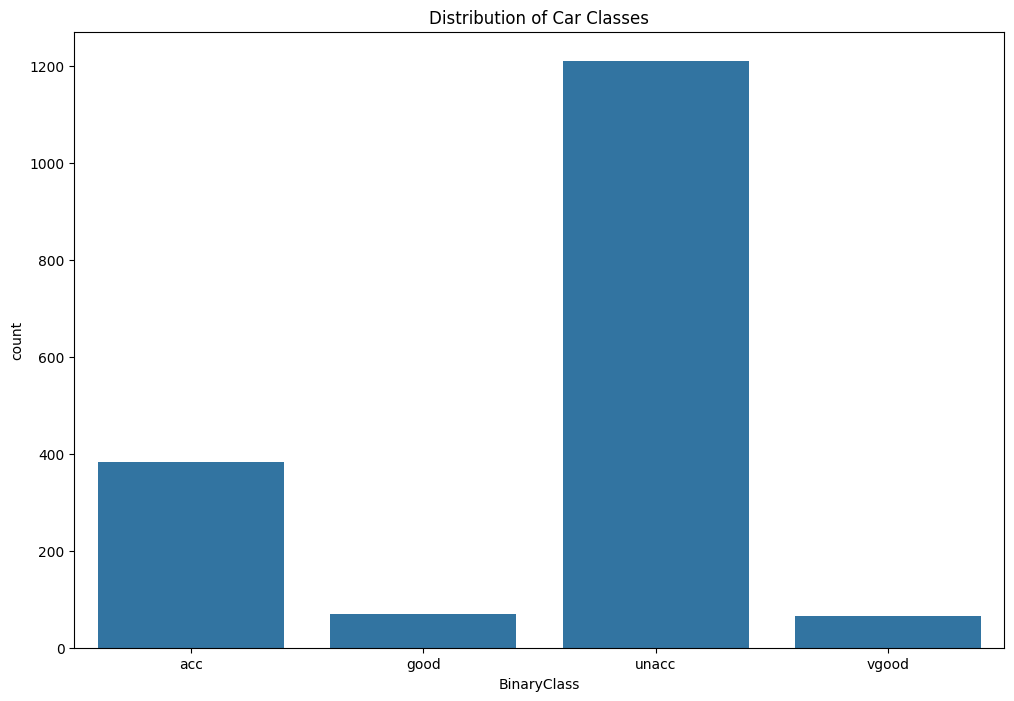

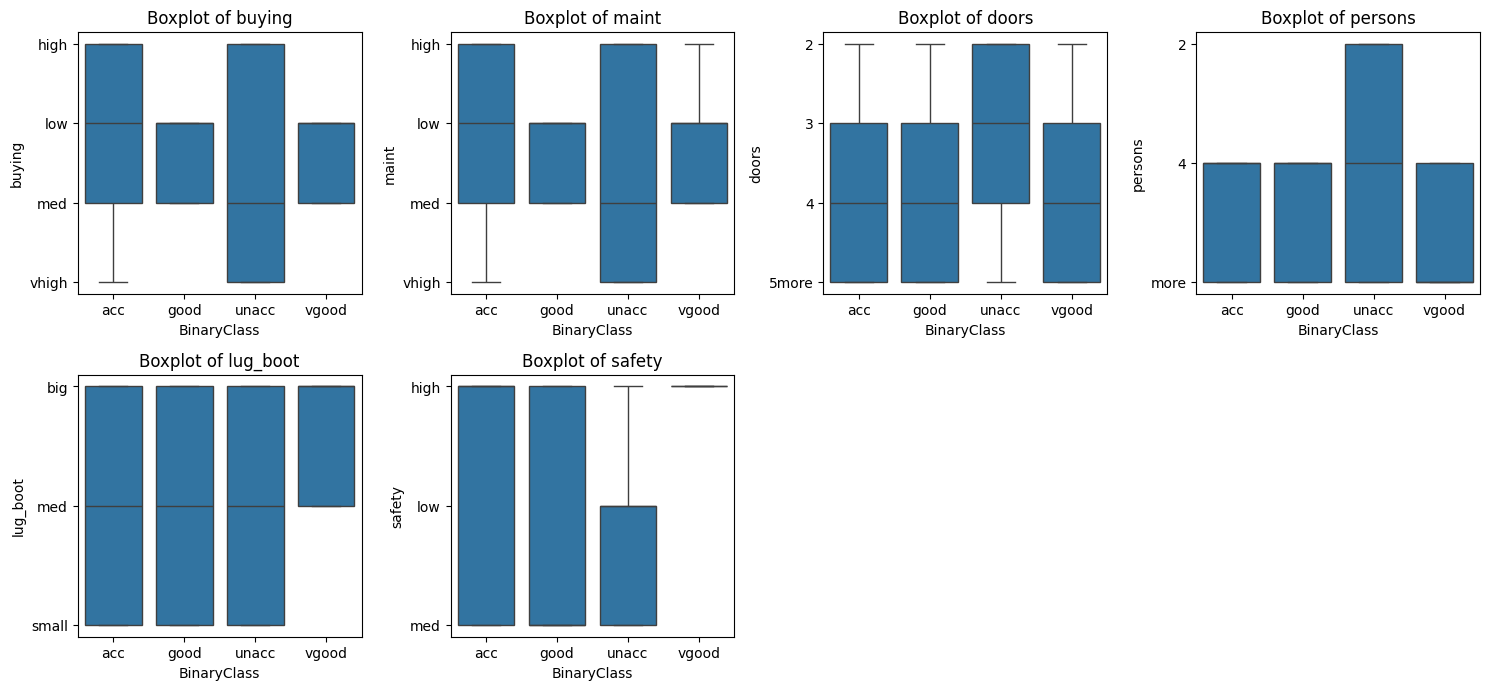

In [4]:
plt.figure(figsize=(12, 8))
sns.countplot(x='BinaryClass', data=df)
plt.title('Distribution of Car Classes')
plt.show()

plt.figure(figsize=(15, 10))
for i in range(len(df.columns) - 1):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x='BinaryClass', y=df.columns[i], data=df)
    plt.title(f'Boxplot of {df.columns[i]}')
plt.tight_layout()
plt.show()

In [5]:
X = df.drop('BinaryClass', axis=1)
y = df['BinaryClass']
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.8940269749518305
              precision    recall  f1-score   support

         acc       0.84      0.71      0.77       118
        good       0.50      0.68      0.58        19
       unacc       0.95      0.98      0.96       358
       vgood       0.71      0.71      0.71        24

    accuracy                           0.89       519
   macro avg       0.75      0.77      0.75       519
weighted avg       0.90      0.89      0.89       519



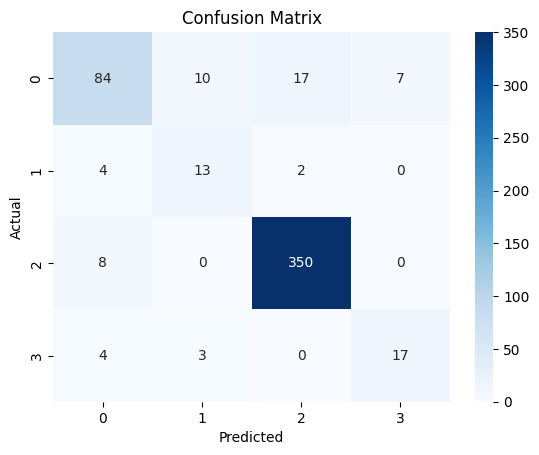

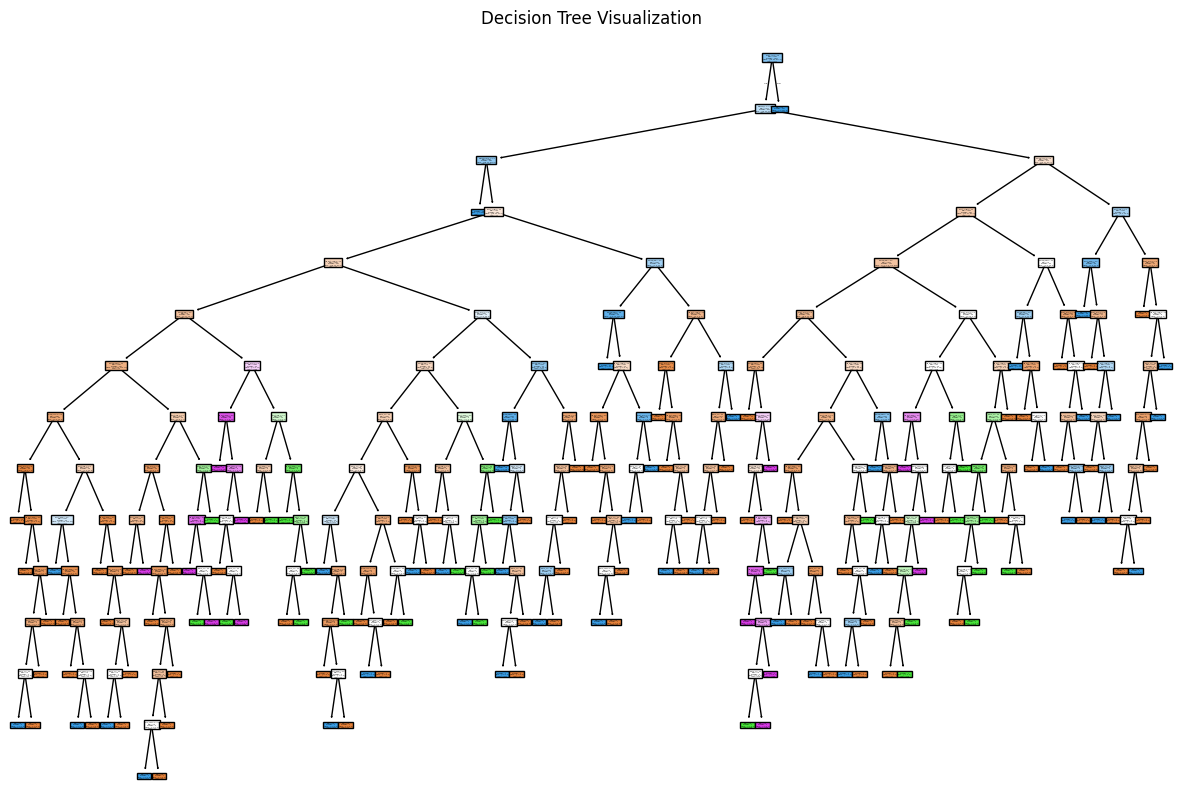

In [15]:
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) # Removed extra indentation here
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

plt.figure(figsize=(15, 10))
plot_tree(dt_classifier, filled=True, feature_names=X.columns, class_names=dt_classifier.classes_)
plt.title('Decision Tree Visualization')
plt.show()

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=gini, max_

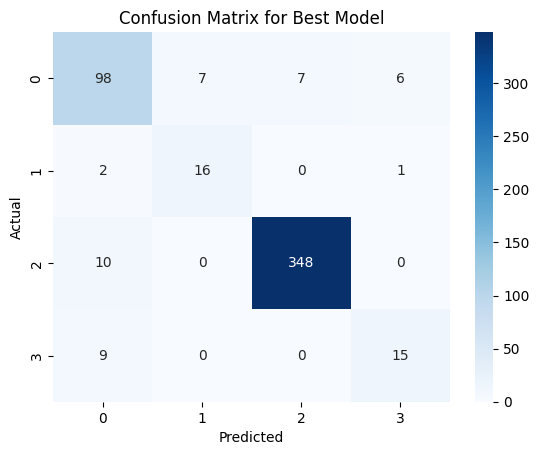

In [17]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, refit=True, verbose=2)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

print(classification_report(y_test, y_pred_best))
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix_best, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Best Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()